In [318]:
#importing Libraries
import os
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN

In [319]:
os.getcwd()

'C:\\Users\\ABC\\Python'

In [320]:
# Reading test and train data
churn_train = pd.read_csv("E:\Edwisor\Projects\Churn Reduction\Train_data.csv", sep = ',')
churn_test=pd.read_csv("E:\Edwisor\Projects\Churn Reduction\Test_data.csv", sep = ',')

In [321]:
churn_train.shape

(3333, 21)

In [322]:
churn_test.shape

(1667, 21)

In [323]:
# Combining train and test data
train_data=churn_train.append(churn_test)

In [324]:
train_data.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [325]:
train_data.shape

(5000, 21)

In [326]:
 train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 21 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null int64
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes           

In [327]:
# Extracting predictive variables

train_data= train_data.drop(['area code','state','phone number'],axis=1)

In [328]:
train_data.shape

(5000, 18)

In [329]:
train_data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'number customer service calls', 'Churn'],
      dtype='object')

In [192]:
#Assigning levels to the categories
lis=[]
for i in range (0, train_data.shape[1]):
        if(train_data.iloc[:,i].dtypes == 'object'):
            train_data.iloc[:,i]=pd.Categorical(train_data.iloc[:,i])
            train_data.iloc[:,i]=train_data.iloc[:,i].cat.codes
            train_data.iloc[:,i]=train_data.iloc[:,i].astype('object')
            lis.append(train_data.columns[i])

In [193]:
lis

['international plan', 'voice mail plan', 'Churn']

In [194]:
train_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [195]:
# Missing Value Analysis
missing_val = pd.DataFrame(train_data.isnull().sum())
missing_val

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0
total eve calls,0
total eve charge,0


In [196]:
# numeric Variable
num_names=list(set(train_data.columns)-set(lis))

In [199]:
num_names

['number customer service calls',
 'account length',
 'total intl calls',
 'total intl charge',
 'total night calls',
 'total intl minutes',
 'number vmail messages',
 'total night minutes',
 'total eve minutes',
 'total eve charge',
 'total day calls',
 'total day minutes',
 'total day charge',
 'total night charge',
 'total eve calls']

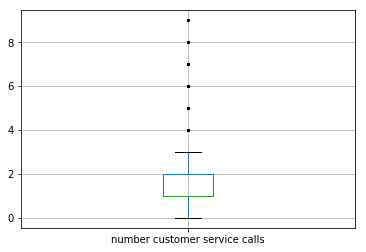

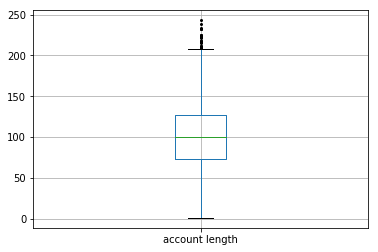

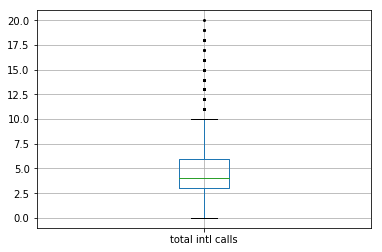

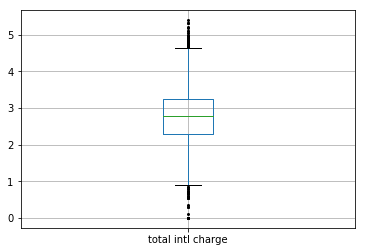

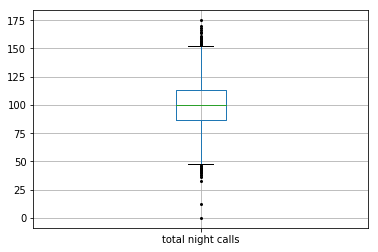

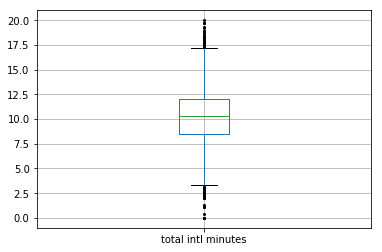

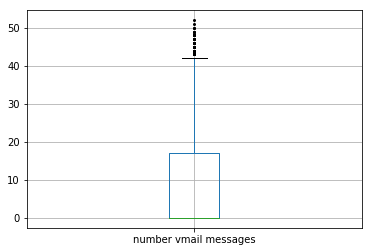

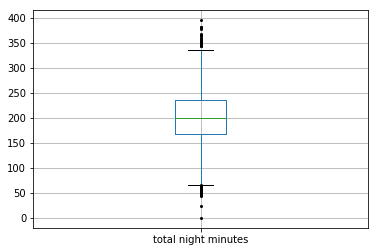

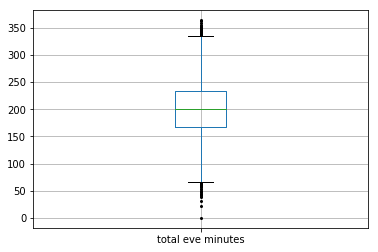

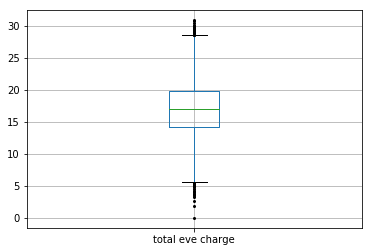

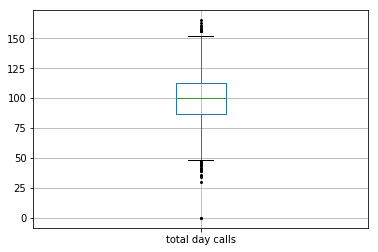

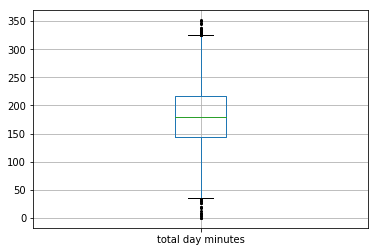

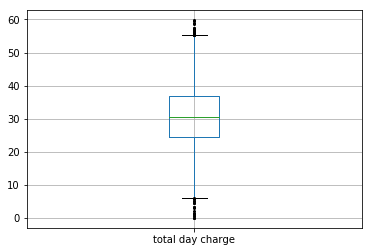

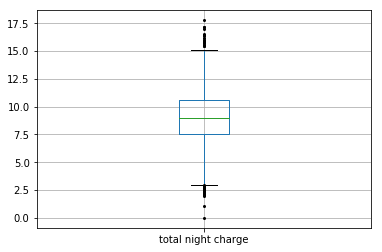

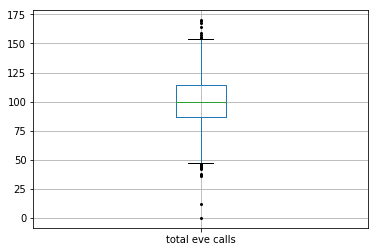

In [200]:
# Creating Box Plot for Outlier Analysis
%matplotlib inline
for i in num_names:
    train_data.boxplot(column=i,flierprops=dict(marker='.', markerfacecolor='black', markersize=4))
    plt.show()

In [201]:
# Outlier Analysis
for i in num_names:
    print(i)
    #Extract Quartiles
    q75,q25=np.percentile(train_data.loc[:,i],[ 75,25])
    
    #Calculate IQR
    iqr = q75-q25
    
    #Calculating Minimum and Maximum values or Inner and Outer fence
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    
    #Replacing Outliers with NA
    train_data.loc[train_data[i] < min,i] = np.nan
    train_data.loc[train_data[i] > max,i] = np.nan


number customer service calls
-0.5
3.5
account length
-8.0
208.0
total intl calls
-1.5
10.5
total intl charge
0.8899999999999992
4.65
total night calls
48.0
152.0
total intl minutes
3.25
17.25
number vmail messages
-25.5
42.5
total night minutes
65.20000000000003
336.4
total eve minutes
64.78750000000001
335.6875
total eve charge
5.5000000000000036
28.539999999999996
total day calls
48.0
152.0
total day minutes
34.94999999999999
324.95
total day charge
5.949999999999999
55.230000000000004
total night charge
2.9349999999999987
15.135000000000002
total eve calls
46.5
154.5


In [202]:
# Checking Missing Values in Data Frame after outlier Analysis
missing_val = pd.DataFrame(train_data.isnull().sum())

In [203]:
missing_val

,0
account length,24
international plan,0
voice mail plan,0
number vmail messages,60
total day minutes,34
total day calls,35
total day charge,34
total eve minutes,43
total eve calls,27
total eve charge,42


In [204]:
# Imputing missing values in dataframe using KNN-imputation
train_data= pd.DataFrame(KNN(k =5).complete(train_data), columns = train_data.columns)

Imputing row 1/5000 with 0 missing, elapsed time: 10.970
Imputing row 101/5000 with 1 missing, elapsed time: 10.973
Imputing row 201/5000 with 0 missing, elapsed time: 10.976
Imputing row 301/5000 with 0 missing, elapsed time: 10.979
Imputing row 401/5000 with 0 missing, elapsed time: 10.981
Imputing row 501/5000 with 0 missing, elapsed time: 10.982
Imputing row 601/5000 with 0 missing, elapsed time: 10.984
Imputing row 701/5000 with 0 missing, elapsed time: 10.986
Imputing row 801/5000 with 0 missing, elapsed time: 10.987
Imputing row 901/5000 with 0 missing, elapsed time: 10.989
Imputing row 1001/5000 with 0 missing, elapsed time: 10.992
Imputing row 1101/5000 with 0 missing, elapsed time: 10.995
Imputing row 1201/5000 with 1 missing, elapsed time: 10.998
Imputing row 1301/5000 with 0 missing, elapsed time: 11.001
Imputing row 1401/5000 with 2 missing, elapsed time: 11.004
Imputing row 1501/5000 with 0 missing, elapsed time: 11.006
Imputing row 1601/5000 with 0 missing, elapsed time:

In [205]:
missing_val_1 = pd.DataFrame(train_data.isnull().sum())

In [206]:
missing_val_1

,0
account length,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0
total eve calls,0
total eve charge,0


In [207]:
# Correlation Analysis(feature selection)
train_data_corr=train_data.loc[:,num_names]

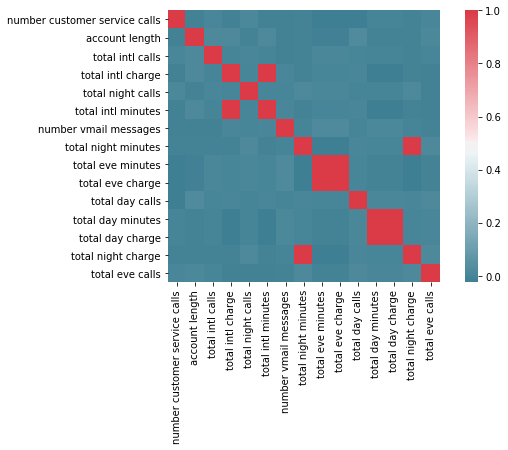

In [209]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(9, 5))

#Generate correlation matrix
corr = train_data_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#plt.savefig('plot.png')

In [210]:
#Chi-square test for Categorical Variable
lis.remove('Churn')
for i in lis:
    print(i)
    chi2,p,dof,ex = chi2_contingency(pd.crosstab(train_data['Churn'], train_data[i]))
    print(p)

international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15


# Feature Scaling

(array([ 11.,  16.,  25.,  30.,  39.,  54.,  72.,  89., 108., 148., 166.,
        192., 242., 262., 288., 280., 307., 310., 303., 312., 263., 273.,
        238., 184., 183., 135., 101.,  95.,  91.,  58.,  47.,  29.,  23.,
         14.,  12.]),
 array([ 35.1       ,  43.37428571,  51.64857143,  59.92285714,
         68.19714286,  76.47142857,  84.74571429,  93.02      ,
        101.29428571, 109.56857143, 117.84285714, 126.11714286,
        134.39142857, 142.66571429, 150.94      , 159.21428571,
        167.48857143, 175.76285714, 184.03714286, 192.31142857,
        200.58571429, 208.86      , 217.13428571, 225.40857143,
        233.68285714, 241.95714286, 250.23142857, 258.50571429,
        266.78      , 275.05428571, 283.32857143, 291.60285714,
        299.87714286, 308.15142857, 316.42571429, 324.7       ]),
 <a list of 35 Patch objects>)

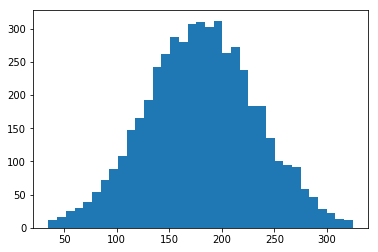

In [213]:
#Normality check
%matplotlib inline 
plt.hist(train_data["total day minutes"], bins='auto')
# After separate checking all the num_names variables it is found that they all are normally distributed

In [214]:
#Standarisation
for i in num_names:
    print(i)
    train_data[i] = (train_data[i] - train_data[i].mean())/train_data[i].std()

number customer service calls
account length
total intl calls
total intl charge
total night calls
total intl minutes
number vmail messages
total night minutes
total eve minutes
total eve charge
total day calls
total day minutes
total day charge
total night charge
total eve calls


In [215]:
## Drop Variables which are dependent on other variables
train_data = train_data.drop(['total day charge', 'total eve charge','total night charge','total intl charge'],axis=1)

In [216]:
train_data.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'number customer service calls', 'Churn'],
      dtype='object')

In [217]:
#Separating dataset into train and test

train=train_data.iloc[0:3333,:]
test=train_data.iloc[3333:5000,:]
test= test.reset_index(drop=True)

In [218]:
train_1=train.copy()

test_1=test.copy()

In [223]:
train_1.shape

(3333, 14)

In [224]:
test_1.shape

(1667, 14)

In [225]:
train.shape

(3333, 14)

In [226]:
test.shape

(1667, 14)

In [227]:
# Decision Tree Model 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [228]:
# Decision tree Model
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(train.values[:,0:13],train.values[:,13])

In [229]:
C50_Predictions = C50_model.predict(test.values[:,0:13])

In [237]:
# Evaluating the Decision Tree Model
ConfMat_C50 = pd.crosstab(test.values[:,13],C50_Predictions)
TN = ConfMat_C50.iloc[0,0]
FN = ConfMat_C50.iloc[1,0]
TP = ConfMat_C50.iloc[1,1]
FP = ConfMat_C50.iloc[0,1]

Accuracy_C50 = ((TP+TN)*100)/(TP+TN+FP+FN)
FNR_C50 = (FN*100)/(FN+TP)


#Accuracy: 88.90
#FNR: 37.94

In [238]:
ConfMat_C50

col_0,0.0,1.0
row_0,,
0.0,1343,100
1.0,85,139


In [239]:
Accuracy_C50

88.90221955608878

In [240]:
FNR_C50

37.94642857142857

In [252]:
train=train_1.copy()

In [242]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 400).fit(train.values[:,0:13], train.values[:,13])

In [243]:
RF_Predictions = RF_model.predict(test.values[:,0:13])

In [249]:
# Evaluating the Random Forest Model
ConfMat_RF = pd.crosstab(test.values[:,13],RF_Predictions)

TN = ConfMat_RF.iloc[0,0]
FN = ConfMat_RF.iloc[1,0]
TP = ConfMat_RF.iloc[1,1]
FP = ConfMat_RF.iloc[0,1]

Accuracy_RF = ((TP+TN)*100)/(TP+TN+FP+FN)
FNR_RF = (FN*100)/(FN+TP)

#Accuracy 93.44
#FNR 48.66

In [250]:
Accuracy_RF

93.4613077384523

In [248]:
FNR_RF

48.660714285714285

In [251]:
train=train_1.copy()

In [253]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(train.values[:,0:13], train.values[:,13])

In [254]:
NB_Predictions = NB_model.predict(test.values[:,0:13])

In [255]:
# Evaluating the Naive Bayes Model

ConfMat_NB=pd.crosstab(test.values[:,13],NB_Predictions)

TN = ConfMat_NB.iloc[0,0]
FN = ConfMat_NB.iloc[1,0]
TP = ConfMat_NB.iloc[1,1]
FP = ConfMat_NB.iloc[0,1]

Accuracy_NB = ((TP+TN)*100)/(TP+TN+FP+FN)
FNR_NB = (FN*100)/(FN+TP)

##Accuracy = 85.90
## FNR = 67.85


In [256]:
Accuracy_NB

85.90281943611278

In [257]:
FNR_NB

67.85714285714286

In [279]:
train_data_1=train_data.copy()

In [282]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
account length                   5000 non-null float64
international plan               5000 non-null float64
voice mail plan                  5000 non-null float64
number vmail messages            5000 non-null float64
total day minutes                5000 non-null float64
total day calls                  5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null float64
total intl minutes               5000 non-null float64
total intl calls                 5000 non-null float64
number customer service calls    5000 non-null float64
Churn                            5000 non-null float64
dtypes: float64(14)
memory usage: 547.0 KB


In [283]:
train_data_1['Churn'] = train_data_1['Churn'].astype('object')
train_data_1['international plan'] =train_data_1['international plan'].astype('object')
train_data_1['voice mail plan'] = train_data_1['voice mail plan'].astype('object')

In [284]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
account length                   5000 non-null float64
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null float64
total day minutes                5000 non-null float64
total day calls                  5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null float64
total intl minutes               5000 non-null float64
total intl calls                 5000 non-null float64
number customer service calls    5000 non-null float64
Churn                            5000 non-null object
dtypes: float64(11), object(3)
memory usage: 547.0+ KB


In [287]:
# Preparing data for Logistic Regression Model

logit_reg_model = pd.DataFrame(train_data_1['Churn'])

In [288]:
# Create the list of numeric Variable for logistic regression
logit_num_names=['number customer service calls','account length','total intl calls','total night calls','total intl minutes',\
 'number vmail messages','total night minutes','total eve minutes','total day calls','total day minutes','total eve calls']

In [289]:
#Add continous variables
logit_reg_model = logit_reg_model.join(train_data_1[logit_num_names])

In [290]:
# Creating dummies for categorical variables
for i in lis:
    temp = pd.get_dummies(train_data_1[i], prefix = i)
    logit_reg_model = logit_reg_model.join(temp)

In [291]:
logit_reg_model.head()

,Churn,number customer service calls,account length,total intl calls,total night calls,total intl minutes,number vmail messages,total night minutes,total eve minutes,total day calls,total day minutes,total eve calls,international plan_0.0,international plan_1.0,voice mail plan_0.0,voice mail plan_1.0
0,0,-0.329755,0.729694,-0.597610,-0.461297,-0.116305,1.369483,0.910223,-0.066010,0.511278,1.620077,-0.064576,1,0,0,1
1,0,-0.329755,0.188726,-0.597610,0.165109,1.333705,1.446897,1.109483,-0.105076,1.189635,-0.358448,0.142550,1,0,0,1
2,0,-1.390802,0.961537,0.372650,0.217310,0.745863,-0.565878,-0.776295,-1.632756,0.720003,1.205256,0.505021,1,0,1,0
3,0,0.731293,-0.403763,1.342911,-0.565698,-1.448746,-0.565878,-0.071696,-0.673919,-1.523794,2.275762,-0.634173,0,1,1,0
4,0,1.792340,-0.635606,-0.597610,1.104719,-0.077115,-0.565878,-0.277119,-1.075553,0.667822,-0.260956,1.126399,0,1,1,0


In [292]:
logit_reg_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
Churn                            5000 non-null object
number customer service calls    5000 non-null float64
account length                   5000 non-null float64
total intl calls                 5000 non-null float64
total night calls                5000 non-null float64
total intl minutes               5000 non-null float64
number vmail messages            5000 non-null float64
total night minutes              5000 non-null float64
total eve minutes                5000 non-null float64
total day calls                  5000 non-null float64
total day minutes                5000 non-null float64
total eve calls                  5000 non-null float64
international plan_0.0           5000 non-null uint8
international plan_1.0           5000 non-null uint8
voice mail plan_0.0              5000 non-null uint8
voice mail plan_1.0              5000 non-null uint8
dtypes: float64(11), o

In [293]:
# Separating train and test data
train_LR = logit_reg_model.iloc[0:3333,]
test_LR = logit_reg_model.iloc[3333:5000,]
test_LR = test_LR.reset_index(drop=True)

In [294]:
train_LR.shape

(3333, 16)

In [296]:
test_LR.shape

(1667, 16)

In [301]:
# Storing column names of independent variables
train_LR_cols = train_LR.columns[1:16]

In [302]:
train_LR_cols

Index(['number customer service calls', 'account length', 'total intl calls',
       'total night calls', 'total intl minutes', 'number vmail messages',
       'total night minutes', 'total eve minutes', 'total day calls',
       'total day minutes', 'total eve calls', 'international plan_0.0',
       'international plan_1.0', 'voice mail plan_0.0', 'voice mail plan_1.0'],
      dtype='object')

In [303]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train_LR['Churn'].astype('float'), train_LR[train_LR_cols].astype('float')).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.355395
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3319
Method:                           MLE   Df Model:                           13
Date:                Sun, 17 Feb 2019   Pseudo R-squ.:                  0.1411
Time:                        20:52:07   Log-Likelihood:                -1184.5
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                 4.203e-75
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
number customer service calls    -0.0226      0.053     -0.430      0.667      -0.126       0.081
account length                    0.0299      0.053      0.566      0.571      -0.074       0.133
total intl calls                 -0.2382      0.055     -4.319      0.000      -0.346      -0.130
total night calls                 0.0066      0.053      0.123      0.902      -0.098       0.111
total intl minutes                0.1527      0.053      2.859      0.004       0.048       0.257
number vmail messages             0.2996      0.214      1.399      0.162      -0.120       0.719
total night minutes               0.1706      0.053      3.201      0.001       0.066       0.275
total eve minutes                 0.2691      0.054      5.003      0.000       0.164       0.375
total day calls                   0.0556      0.052      1.069      0.285      -0.046       0.158
total day minutes                 0.5638      0.055     10.315      0.000       0.457       0.671
total eve calls                   0.0042      0.053      0.078      0.938      -0.101       0.109
international plan_0.0           -1.7691   2.92e+06  -6.05e-07      1.000   -5.73e+06    5.73e+06
international plan_1.0            0.0612   2.92e+06   2.09e-08      1.000   -5.73e+06    5.73e+06
voice mail plan_0.0              -0.0751   2.92e+06  -2.57e-08      1.000   -5.73e+06    5.73e+06
voice mail plan_1.0              -1.6327   2.92e+06  -5.58e-07      1.000   -5.73e+06    5.73e+06
=================================================================================================
"""

In [305]:
#Predict test data
test_LR['Actual_prob'] = logit.predict(test_LR[train_LR_cols])
test_LR['ActualVal'] = 1
test_LR.loc[test_LR.Actual_prob < 0.5, 'ActualVal'] = 0


In [306]:
#Build confusion matrix
CM = pd.crosstab(test_LR['Churn'], test_LR['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


Accuracy_LR=((TP+TN)*100)/(TP+TN+FP+FN)

FNR_LR = (FN*100)/(FN+TP)

#Accuracy: 87.22
#FNR: 87.05

In [307]:
Accuracy_LR

87.22255548890222

In [308]:
FNR_LR

87.05357142857143